In [ ]:
import pandas as pd
import imblearn
from collections import Counter
data = pd.read_csv('new_dataset_with_label.csv',index_col=0)

In [ ]:
data.iloc[:2339,:-1]

,total_time,compiled,compiled successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,cps,paste_lines,max_pastes,average_test_results,avg_paste
Student,,,,,,,,,,,,,,
A2016\student1013,6894752.0,1441.0,1116.0,689.0,1349.0,38441.0,12365.0,32597.0,2023.0,0.003436,5202.0,120.0,1.957910,4.553441
A2016\student1016,37440.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,8.0,0.000000,NaN,NaN,NaN,NaN
A2016\student1021,9363152.0,2108.0,1278.0,787.0,1605.0,58550.0,19160.0,49003.0,6105.0,0.003997,7270.0,162.0,2.039390,5.147455
A2016\student1029,6949656.0,1775.0,1201.0,852.0,754.0,36461.0,15605.0,30332.0,2683.0,0.005040,7235.0,165.0,0.884977,4.840774
A2016\student1066,2784368.0,338.0,223.0,449.0,810.0,13924.0,6140.0,12169.0,369.0,0.004970,3988.0,139.0,1.804009,3.470160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2016\student9946,2989136.0,311.0,127.0,220.0,335.0,15501.0,12362.0,13196.0,1776.0,0.017313,9610.0,315.0,1.522727,5.385016
B2016\student9949,7787496.0,1961.0,1199.0,588.0,468.0,39601.0,9607.0,30431.0,3452.0,0.002364,3735.0,347.0,0.795918,4.929317
B2016\student9972,12352640.0,5669.0,3568.0,973.0,612.0,55655.0,20719.0,47870.0,3707.0,0.004338,11067.0,232.0,0.628983,4.842414


In [ ]:
data = data.fillna(0)
data["Label"] =data["Label"].astype("int64")
x = data.iloc[:2339,:-1]
y = data.iloc[:2339,-1]

C:\Users\Keerthana\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Not plagiarised'), Text(1, 0, 'plagiarised')]

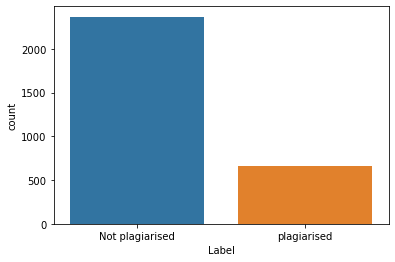

In [ ]:
import seaborn as sns
g = sns.countplot(data['Label'])
g.set_xticklabels(['Not plagiarised','plagiarised'])

In [ ]:
len(x)

2339

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train,Y_train)

In [ ]:
smote_enn = imblearn.combine.SMOTEENN(random_state=0,sampling_strategy='minority')
x_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train,Y_train)
print(sorted(Counter(y_train_resampled).items()))

[(0, 613), (1, 626)]


In [ ]:
x_train_resampled

,total_time,compiled,compiled successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,cps,paste_lines,max_pastes,average_test_results,avg_paste
0,8.360000e+03,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.400000e+04,50.000000,50.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.358400e+05,45.000000,10.000000,60.000000,0.000000,1842.000000,209.000000,1670.000000,35.000000,0.000027,9.000000,1.000000,0.000000,1.000000
3,3.696000e+04,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.002029,8.000000,34.000000,0.000000,9.375000
4,3.696000e+04,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000325,10.000000,2.000000,0.000000,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,2.318901e+06,417.794558,287.988371,189.912214,330.557118,13265.092270,3537.955841,11543.005017,586.136429,0.004455,1355.807251,266.649388,2.011235,8.028814
1235,5.337409e+06,1350.963996,874.418563,857.163051,470.920189,28112.142306,16635.796741,23344.359037,1711.421401,0.004913,9907.399284,156.003015,0.531063,3.809998
1236,4.806433e+06,1125.697994,762.993672,353.045372,194.393829,26111.871438,8630.560651,22203.602001,1505.796145,0.002379,3357.976406,38.334723,0.494651,2.824705
1237,8.692382e+05,105.391063,51.592766,66.423405,165.788730,4926.777808,1906.969386,4296.046108,280.602333,0.005503,1199.822798,80.864893,2.370981,4.056933


In [ ]:
y_train_resampled


0       0
1       0
2       0
3       0
4       0
       ..
1234    1
1235    1
1236    1
1237    1
1238    1
Name: Label, Length: 1239, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier


ran = RandomForestClassifier(n_estimators= 800,
 min_samples_split=2,
 min_samples_leaf=1,
 max_features= 'auto',
 max_depth=100,
 bootstrap =True)
ran.fit(x_train_resampled,y_train_resampled)
print(ran.score(X_test, Y_test))
y_pred = ran.predict(X_test)

0.6495726495726496


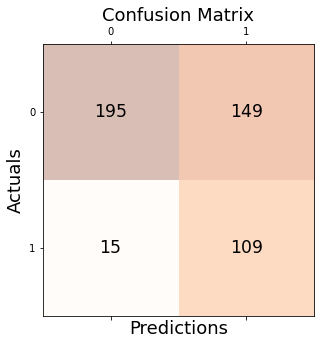

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=ran.predict(X_test))
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(Y_test, y_pred))

Precision: 0.422


In [ ]:
print('Recall: %.3f' % recall_score(Y_test, y_pred))

Recall: 0.879


In [ ]:
print('Accuracy: %.3f' % accuracy_score(Y_test, y_pred))

Accuracy: 0.650


In [ ]:
print('F1 Score: %.3f' % f1_score(Y_test, y_pred))

F1 Score: 0.574


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_resampled,y_train_resampled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}